In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
df=pd.read_csv("Energy_consumption.csv", parse_dates=['Timestamp'], index_col='Timestamp')

In [3]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:
df["HVACUsage"] = df["HVACUsage"].map({"On": 1, "Off": 0})

In [5]:
df["LightingUsage"] = df["LightingUsage"].map({"On": 1, "Off": 0})

In [6]:
df["Holiday"] = df["Holiday"].map({"Yes": 1, "No": 0})

In [7]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732


In [9]:
y = df['EnergyConsumption']
X = df[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy','HVACUsage','Holiday','LightingUsage']]

In [10]:
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

In [11]:
model = SARIMAX(y_train, exog=X_train, order=(22, 0, 22), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit()

C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

In [13]:
mse = mean_squared_error(y_test, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 26.78041436998844


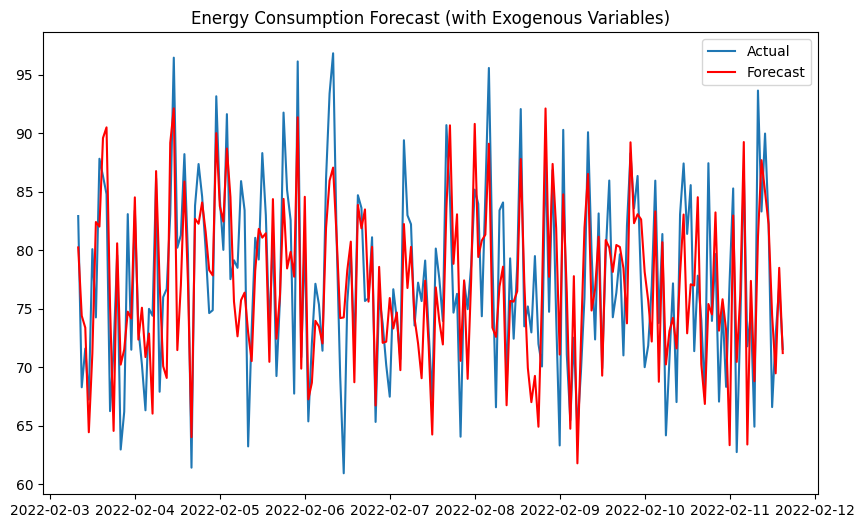

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast (with Exogenous Variables)')
plt.legend()
plt.show()

In [15]:
import pickle

# Save the model to a file
with open('sarimax_energy_model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)
